In [2]:
import os 
import numpy as np 
import nibabel as nib 
import matplotlib.pyplot as plt
from tqdm import tqdm

In [9]:
emph_bone = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/val_test/insp_BONE_emphysema/emphysema"
emph_non_harm_exptoinsp = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exp_toinsp_nonharmonized_emphysema/warped_emphysema_masks"

emph_bone_files = sorted(os.listdir(emph_bone))
emph_non_harm_exptoinsp_files = sorted(os.listdir(emph_non_harm_exptoinsp))

#compute dice overlap between regsitered and bone and registered and standard
dice_overlap_bone_unharmonized = []

def dice_overlap(seg1, seg2):
   seg1 = seg1.astype(bool)
   seg2 = seg2.astype(bool)
   intersection = np.sum(seg1 & seg2)
   union = np.sum(seg1) + np.sum(seg2)
    
   return 2 * intersection / union

for i in tqdm(range(len(emph_bone_files))):
    bone = nib.load(os.path.join(emph_bone, emph_bone_files[i])).get_fdata()
    non_harm_exptoinsp = nib.load(os.path.join(emph_non_harm_exptoinsp, emph_non_harm_exptoinsp_files[i])).get_fdata()

    bone_dice = dice_overlap(bone, non_harm_exptoinsp)

    dice_overlap_bone_unharmonized.append(bone_dice)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [03:08<00:00,  3.64s/it]


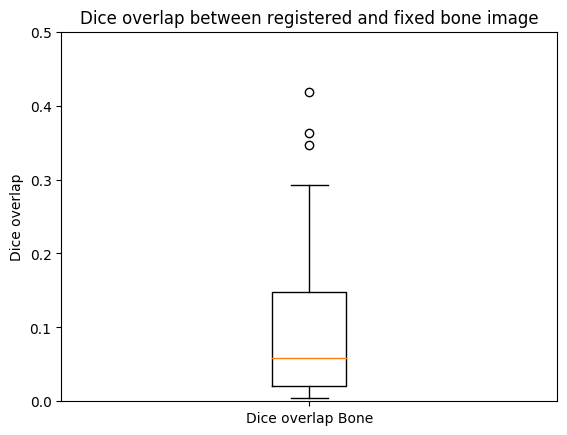

In [13]:
#Plot the dice overlap between registered and bone and registered and standard as boxplots 
plt.figure()
plt.boxplot([dice_overlap_bone_unharmonized])
plt.xticks([1], ['Dice overlap Bone'])
plt.ylabel("Dice overlap")
plt.ylim(0, 0.5)
plt.title("Dice overlap between registered and fixed bone image")
plt.show()


In [16]:
emph_bone = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/experiments/insp_exp_run1_results_cycleGAN/harmonized_emphysema_epoch5/emphysema"
emph_harm_exptoinsp = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exptoinsp_harmonized_emphysema/warped_emphysema_masks"

emph_bone_files = sorted(os.listdir(emph_bone))
emph_harm_exptoinsp_files = sorted(os.listdir(emph_harm_exptoinsp))

#compute dice overlap between regsitered and bone and registered and standard
dice_overlap_bone = []

def dice_overlap(seg1, seg2):
   seg1 = seg1.astype(bool)
   seg2 = seg2.astype(bool)
   intersection = np.sum(seg1 & seg2)
   union = np.sum(seg1) + np.sum(seg2)
    
   return 2 * intersection / union

for i in tqdm(range(len(emph_bone_files))):
    bone = nib.load(os.path.join(emph_bone, emph_bone_files[i])).get_fdata()
    harm_exptoinsp = nib.load(os.path.join(emph_harm_exptoinsp, emph_harm_exptoinsp_files[i])).get_fdata()

    bone_dice = dice_overlap(bone, harm_exptoinsp)

    dice_overlap_bone.append(bone_dice)

100%|██████████| 50/50 [02:59<00:00,  3.51s/it]


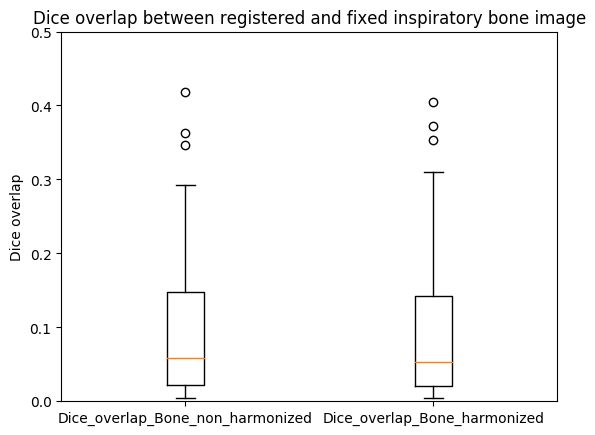

In [21]:
plt.figure()
plt.boxplot([dice_overlap_bone_unharmonized, dice_overlap_bone])
plt.xticks([1, 2], ['Dice_overlap_Bone_non_harmonized', 'Dice_overlap_Bone_harmonized'])
plt.ylabel("Dice overlap")
plt.ylim(0, 0.5)
plt.title("Dice overlap between registered and fixed inspiratory bone image")
plt.show()

In [20]:
from scipy.stats import wilcoxon, ttest_rel
stat, p = wilcoxon(dice_overlap_bone_unharmonized, dice_overlap_bone)

t_stat, p_value = ttest_rel(dice_overlap_bone_unharmonized, dice_overlap_bone)

print("Statistics=%.3f, p=%.3f" % (stat, p))
print("Statistics=%.3f, p=%.3f" % (t_stat, p_value))

Statistics=400.000, p=0.022
Statistics=1.916, p=0.061


### Inspiratory to expiratory

In [ ]:
emph_bone = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/val_test/insp_STANDARD_emphysema/emphysema"
emph_non_harm_exptoinsp = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exp_toinsp_nonharmonized_emphysema/warped_emphysema_insp_to_exp"

emph_bone_files = sorted(os.listdir(emph_bone))
emph_non_harm_exptoinsp_files = sorted(os.listdir(emph_non_harm_exptoinsp))

#compute dice overlap between regsitered and bone and registered and standard
dice_overlap_bone_unharmonized = []

def dice_overlap(seg1, seg2):
   seg1 = seg1.astype(bool)
   seg2 = seg2.astype(bool)
   intersection = np.sum(seg1 & seg2)
   union = np.sum(seg1) + np.sum(seg2)
    
   return 2 * intersection / union

for i in tqdm(range(len(emph_bone_files))):
    bone = nib.load(os.path.join(emph_bone, emph_bone_files[i])).get_fdata()
    non_harm_exptoinsp = nib.load(os.path.join(emph_non_harm_exptoinsp, emph_non_harm_exptoinsp_files[i])).get_fdata()

    bone_dice = dice_overlap(bone, non_harm_exptoinsp)

    dice_overlap_bone_unharmonized.append(bone_dice)